# Exploratory data analysis

In [38]:
! pip install seaborn
! pip install patool
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages/')

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

# Calculate Lipinski descriptors

Lipinski descriptors, developed by Christopher Lipinski, are a means of evaluating the "druglikeness" of compounds based on factors like absorption, distribution, metabolism, and excretion (aka ADME). This is also known as the pharmacokinetic profile of a compound. 

Lipinski's Rule sets the following criteria for "druglikeness":
- molecular weight < 500 Da
- octanol-water partition coefficient (LogP) < 5
- hydrogen bond donors < 5
- hydrogen bond acceptors < 10

In [41]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Calculate descriptors

In [42]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# function for calculating Lipinski descriptors given an input of SMILES
# notation which contains exact atomic details of molecule

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [43]:
df_lipinski = lipinski(df.canonical_smiles)

# Combine DataFrames

Firstly, the DataFrame obtained from the lipinski function:

In [44]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,393.483,5.21400,1.0,5.0
1,380.444,3.85650,3.0,5.0
2,262.357,0.94970,3.0,4.0
3,262.357,0.94970,3.0,4.0
4,274.368,0.95130,3.0,4.0
...,...,...,...,...
598,316.405,1.36482,2.0,5.0
599,338.415,2.32836,0.0,6.0
600,338.415,2.32836,0.0,6.0
601,311.746,3.37930,2.0,5.0


Secondly, the DataFrame containing molecule_chembl_id, standard_value, and bioactivity_class values:

In [45]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4063356,CCOC(=O)c1c(-c2ccccc2)oc2ccc(O)c(CN3CCC(C)CC3)c12,260.00,active
1,CHEMBL4443524,CNC(=O)c1c(-c2ccc(O)cc2)oc2ccc(O)c(CN3CCCCC3)c12,0.19,active
2,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,60252.77,inactive
3,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,24975.53,inactive
4,CHEMBL3442632,CNC(=O)c1cc2c(nc1NCC1CC1)CCNCC2,71971.34,inactive
...,...,...,...,...
598,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,100000.00,inactive
599,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,8775.22,intermediate
600,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,12694.87,inactive
601,CHEMBL3496335,COc1cc(/C=C/c2ncc(C(=O)O)s2)cc(Cl)c1O,23660.95,inactive


In [46]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [47]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4063356,CCOC(=O)c1c(-c2ccccc2)oc2ccc(O)c(CN3CCC(C)CC3)c12,260.00,active,393.483,5.21400,1.0,5.0
1,CHEMBL4443524,CNC(=O)c1c(-c2ccc(O)cc2)oc2ccc(O)c(CN3CCCCC3)c12,0.19,active,380.444,3.85650,3.0,5.0
2,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,60252.77,inactive,262.357,0.94970,3.0,4.0
3,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,24975.53,inactive,262.357,0.94970,3.0,4.0
4,CHEMBL3442632,CNC(=O)c1cc2c(nc1NCC1CC1)CCNCC2,71971.34,inactive,274.368,0.95130,3.0,4.0
...,...,...,...,...,...,...,...,...
598,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,100000.00,inactive,316.405,1.36482,2.0,5.0
599,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,8775.22,intermediate,338.415,2.32836,0.0,6.0
600,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,12694.87,inactive,338.415,2.32836,0.0,6.0
601,CHEMBL3496335,COc1cc(/C=C/c2ncc(C(=O)O)s2)cc(Cl)c1O,23660.95,inactive,311.746,3.37930,2.0,5.0


# Convert IC50 to pIC50

IC50 must be converted to a negative logarithmic scale (-log10(IC50)) to allow more uniform distribution of data.

The custom function pIC50() accepts a DataFrame as input and will:
- Take the IC50 values from the standard_value column and convert them from nM to M by multiplying the value by 10^-9
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [48]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative. 

In [49]:
df_combined.standard_value.describe()

count       603.000000
mean      66820.666633
std       38851.431269
min           0.190000
25%       22788.650000
50%      100000.000000
75%      100000.000000
max      100000.000000
Name: standard_value, dtype: float64

Apply the norm_value() function to normalize the values in the standard_value column

In [50]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [51]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\cmkin\AppData\Local\Temp\ipykernel_27284\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4063356,CCOC(=O)c1c(-c2ccccc2)oc2ccc(O)c(CN3CCC(C)CC3)c12,active,393.483,5.21400,1.0,5.0,260.00
1,CHEMBL4443524,CNC(=O)c1c(-c2ccc(O)cc2)oc2ccc(O)c(CN3CCCCC3)c12,active,380.444,3.85650,3.0,5.0,0.19
2,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,60252.77
3,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,24975.53
4,CHEMBL3442632,CNC(=O)c1cc2c(nc1NCC1CC1)CCNCC2,inactive,274.368,0.95130,3.0,4.0,71971.34
...,...,...,...,...,...,...,...,...
598,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,inactive,316.405,1.36482,2.0,5.0,100000.00
599,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,intermediate,338.415,2.32836,0.0,6.0,8775.22
600,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,inactive,338.415,2.32836,0.0,6.0,12694.87
601,CHEMBL3496335,COc1cc(/C=C/c2ncc(C(=O)O)s2)cc(Cl)c1O,inactive,311.746,3.37930,2.0,5.0,23660.95


In [52]:
df_norm.standard_value_norm.describe()

count       603.000000
mean      66820.666633
std       38851.431269
min           0.190000
25%       22788.650000
50%      100000.000000
75%      100000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [53]:
df_final = pIC50(df_norm)
df_final

C:\Users\cmkin\AppData\Local\Temp\ipykernel_27284\3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4063356,CCOC(=O)c1c(-c2ccccc2)oc2ccc(O)c(CN3CCC(C)CC3)c12,active,393.483,5.21400,1.0,5.0,6.585027
1,CHEMBL4443524,CNC(=O)c1c(-c2ccc(O)cc2)oc2ccc(O)c(CN3CCCCC3)c12,active,380.444,3.85650,3.0,5.0,9.721246
2,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,4.220023
3,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,4.602485
4,CHEMBL3442632,CNC(=O)c1cc2c(nc1NCC1CC1)CCNCC2,inactive,274.368,0.95130,3.0,4.0,4.142840
...,...,...,...,...,...,...,...,...
598,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,inactive,316.405,1.36482,2.0,5.0,4.000000
599,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,intermediate,338.415,2.32836,0.0,6.0,5.056742
600,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,inactive,338.415,2.32836,0.0,6.0,4.896372
601,CHEMBL3496335,COc1cc(/C=C/c2ncc(C(=O)O)s2)cc(Cl)c1O,inactive,311.746,3.37930,2.0,5.0,4.625968


In [54]:
df_final.pIC50.describe()

count    603.000000
mean       4.314884
std        0.458312
min        4.000000
25%        4.000000
50%        4.000000
75%        4.642309
max        9.721246
Name: pIC50, dtype: float64

# Remove the "intermediate" bioactivity class

The intermediate bioactivity class will be removed from the data set to enable simple comparison between the classes.

In [55]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4063356,CCOC(=O)c1c(-c2ccccc2)oc2ccc(O)c(CN3CCC(C)CC3)c12,active,393.483,5.21400,1.0,5.0,6.585027
1,CHEMBL4443524,CNC(=O)c1c(-c2ccc(O)cc2)oc2ccc(O)c(CN3CCCCC3)c12,active,380.444,3.85650,3.0,5.0,9.721246
2,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,4.220023
3,CHEMBL3442631,CNC(=O)c1cc2c(nc1NC(C)C)CCNCC2,inactive,262.357,0.94970,3.0,4.0,4.602485
4,CHEMBL3442632,CNC(=O)c1cc2c(nc1NCC1CC1)CCNCC2,inactive,274.368,0.95130,3.0,4.0,4.142840
...,...,...,...,...,...,...,...,...
597,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,inactive,316.405,1.36482,2.0,5.0,4.000000
598,CHEMBL3487994,Cc1cnn(CC(C)NCC(=O)NCCOc2ccccc2)c1,inactive,316.405,1.36482,2.0,5.0,4.000000
600,CHEMBL3493579,Cc1nc(C)n(C2CCCN(C(=O)c3nc(C)n4ccccc34)C2)n1,inactive,338.415,2.32836,0.0,6.0,4.896372
601,CHEMBL3496335,COc1cc(/C=C/c2ncc(C(=O)O)s2)cc(Cl)c1O,inactive,311.746,3.37930,2.0,5.0,4.625968


In [56]:
df_2class.to_csv('Pks13_bioactivity_data_2class_pIC50.csv')

# Chemical Space Analysis via Lipinski descriptors

In [57]:
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt

Frequency plot of the two biactivity classes

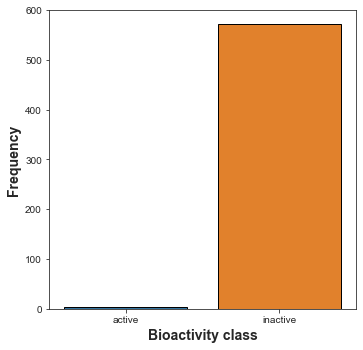

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP

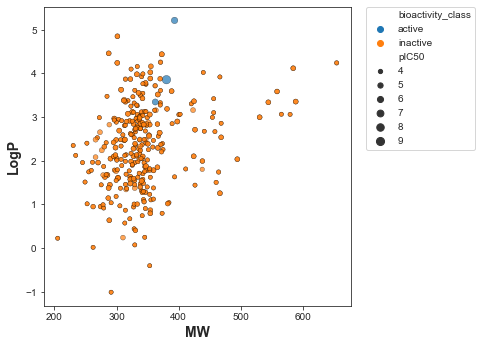

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

This plot demonstrates that the two bioactivity classes, for the most part, span similar chemical spaces.

Box plot of pIC50 value

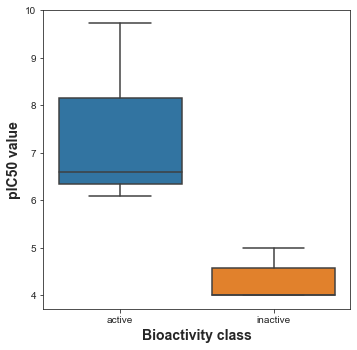

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Utilize the Mann-Whitney U Test for statistical analysis

In [61]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [62]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1716.0,0.000873,0.05,Different distribution (reject H0)


Box plot of molecular weight

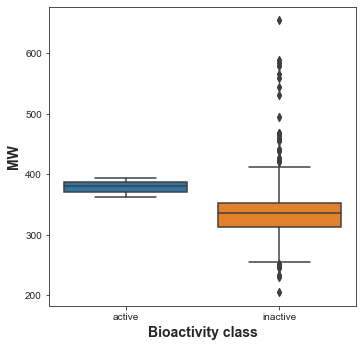

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [64]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1463.0,0.035179,0.05,Different distribution (reject H0)


Box plot of LogP

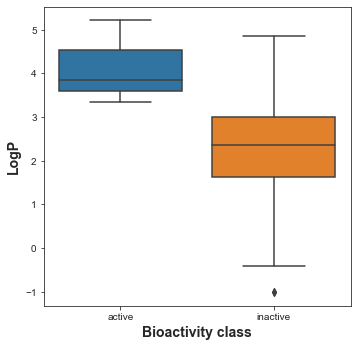

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [66]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1591.0,0.010702,0.05,Different distribution (reject H0)


Box plot of NumHDonors

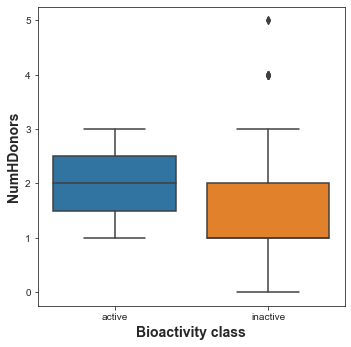

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [68]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1238.5,0.160194,0.05,Same distribution (fail to reject H0)


Box plot of NumHAcceptors

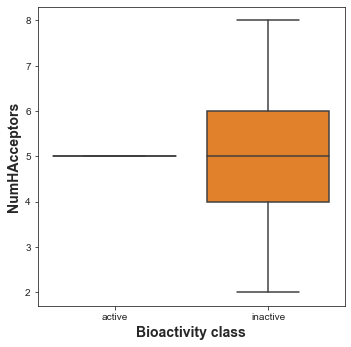

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [70]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,751.5,0.704804,0.05,Same distribution (fail to reject H0)


# Interpretation of statistical results

According to the pIC50 values, the active and inactive compounds displayed statistically significant difference, which is to be expected given the IC50 values used to define active vs. inactive compounds.

Summary of Lipinski's descriptors:
- MW: different distribution
- LogP: different distribution
- NumHDonors: same distribution
- NumHAcceptors: different distribution

Thus, NumHDonors wa the only Lipinski descriptor for which no statistically significant difference between the active and inactive compounds was exhibited.